In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
 
import os
import random
import numpy as np
import matplotlib.pyplot as plt
 
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'
 
%matplotlib inline

In [2]:
#For Normalization
(X_train1, Y_train1), (X_test1, Y_test1) = mnist.load_data()
print(X_train1.shape, Y_train1.shape)
print(X_test1.shape, Y_test1.shape)

#Without Normalization
(X_train2, Y_train2), (X_test2, Y_test2) = mnist.load_data()
print(X_train2.shape, Y_train2.shape)
print(X_test2.shape, Y_test2.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


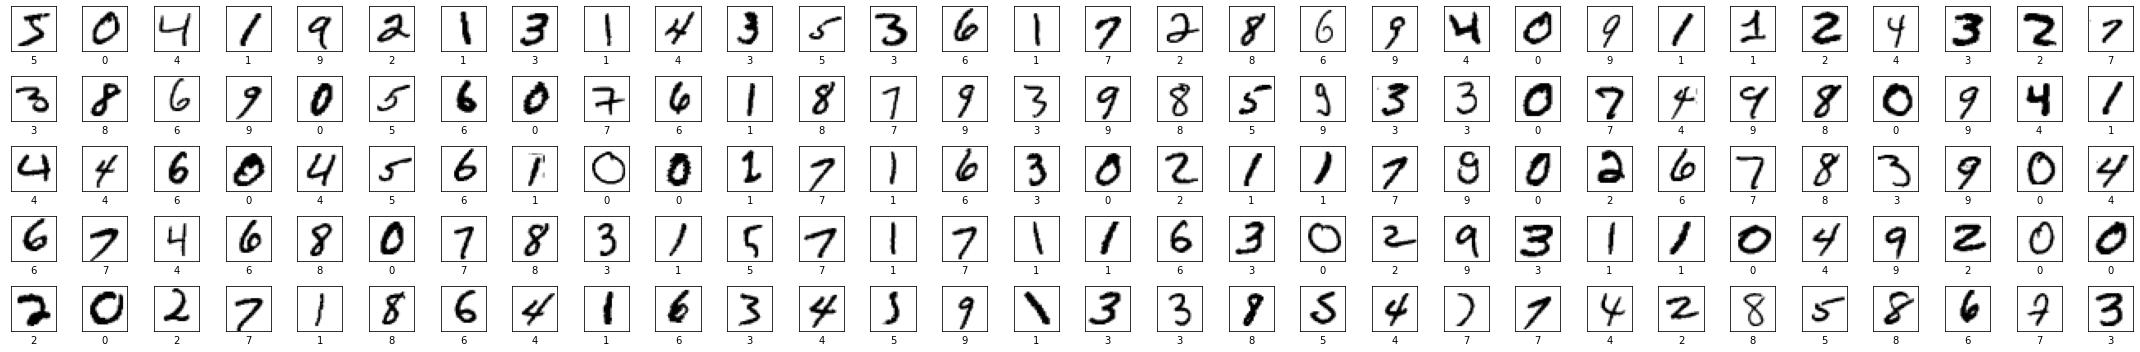

In [3]:
ROWS = 5
COLS = 30
i = 0

plt.figure(figsize=(30,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train1[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train1[i])
        i += 1
plt.tight_layout()
plt.show()

In [4]:
# Data Normalization

X_train1, X_test1 = X_train1.reshape(-1, 28,28,1).astype("float32") / 255.0, X_test1.reshape(-1, 28,28,1).astype("float32")  / 255.0

#Without Normalization

X_train2, X_test2 = X_train2.reshape(-1, 28,28,1), X_test2.reshape(-1, 28,28,1)

In [5]:
# Normalize Data

model1 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [6]:
# Using 'Adam'

model1.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [7]:
# Normalize Data

h1 = model1.fit(x=X_train1, y=Y_train1, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 35s 3ms/step - loss: 0.2447 - accuracy: 0.9229 - val_loss: 0.0799 - val_accuracy: 0.9747
Epoch 2/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0751 - accuracy: 0.9765 - val_loss: 0.0667 - val_accuracy: 0.9812
Epoch 3/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0512 - accuracy: 0.9835 - val_loss: 0.0557 - val_accuracy: 0.9841
Epoch 4/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0411 - accuracy: 0.9871 - val_loss: 0.0501 - val_accuracy: 0.9860
Epoch 5/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.0495 - val_accuracy: 0.9853


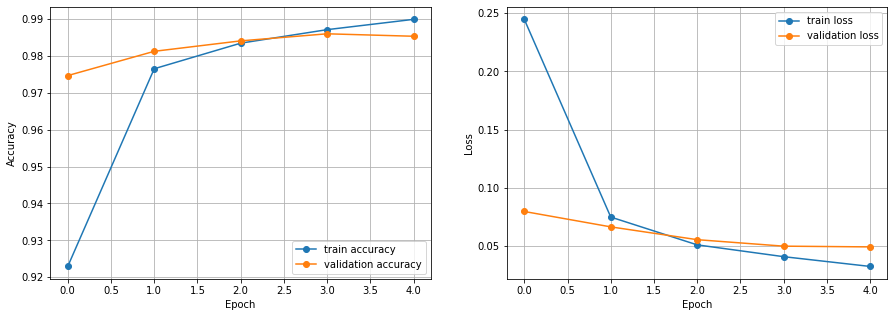

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [9]:
# Normalize Data

test_loss1, test_acc1 = model1.evaluate(X_test1, Y_test1)
print('\nTest Accuracy:', test_acc1)
print('\nTest Loss:', test_loss1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0449 - accuracy: 0.9869

Test Accuracy: 0.9868999719619751

Test Loss: 0.044889237731695175


Got **98.69%** accuracy for Adam ( For normalize data).

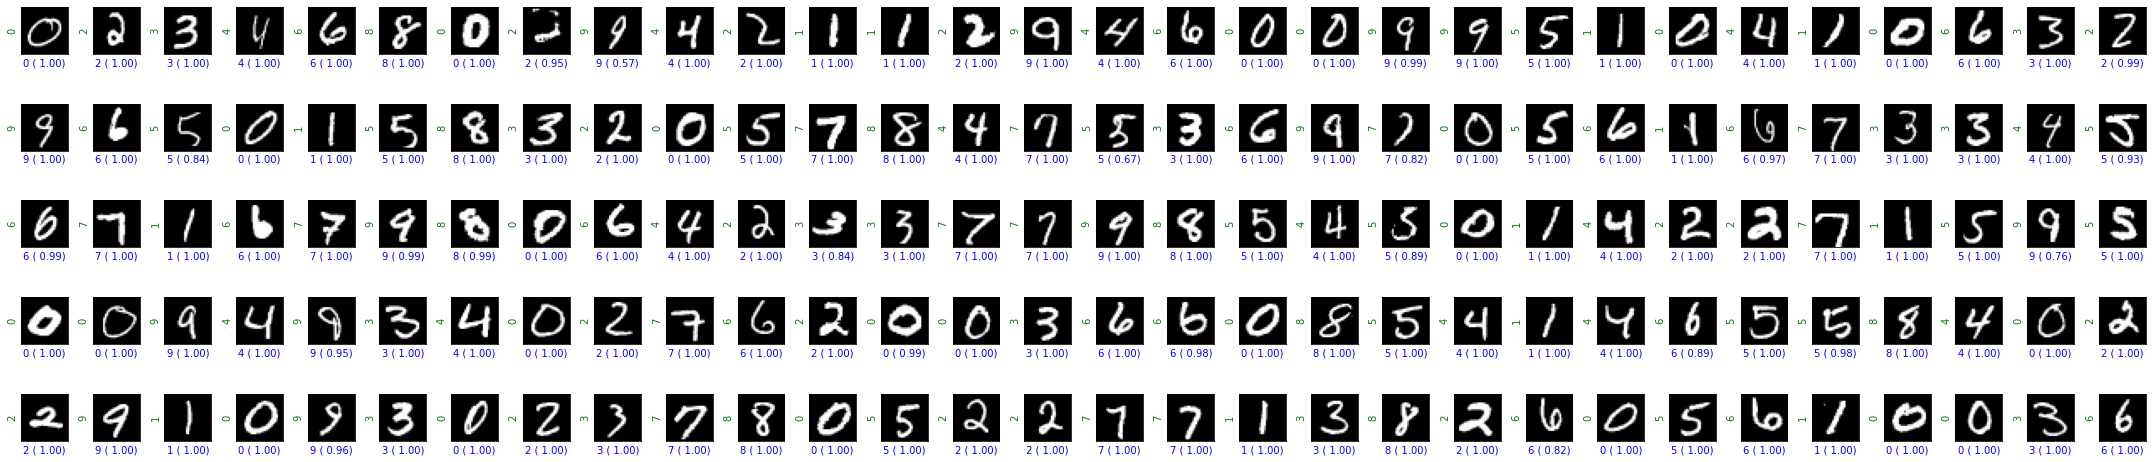

In [10]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test1.shape[0]), ROWS*COLS)
sample_images = X_test1[random_indices, :]
sample_labels = Y_test1[random_indices]
predictions = model1.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [11]:
# Without Normalize Data

model2 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [12]:
# Using 'Adam'

model2.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [13]:
# Without Normalize Data

h2 = model2.fit(x=X_train2, y=Y_train2, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3165 - accuracy: 0.9181 - val_loss: 0.1258 - val_accuracy: 0.9605
Epoch 2/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0855 - accuracy: 0.9744 - val_loss: 0.0947 - val_accuracy: 0.9747
Epoch 3/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0643 - accuracy: 0.9801 - val_loss: 0.0649 - val_accuracy: 0.9822
Epoch 4/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0581 - accuracy: 0.9813 - val_loss: 0.0835 - val_accuracy: 0.9783
Epoch 5/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0515 - accuracy: 0.9844 - val_loss: 0.0951 - val_accuracy: 0.9726


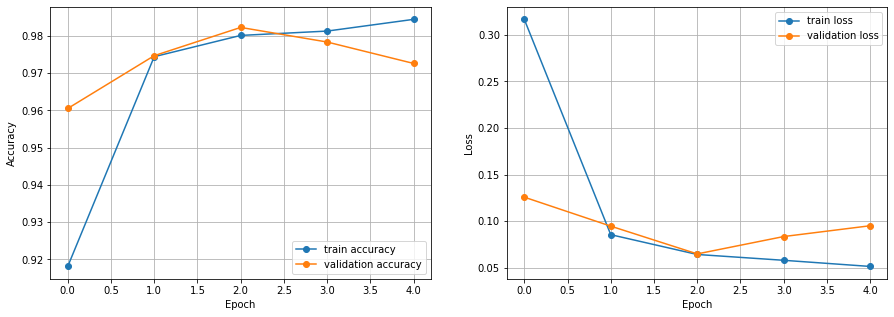

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [15]:
# Without Normalize Data

test_loss2, test_acc2 = model2.evaluate(X_test2, Y_test2)
print('\nTest Accuracy:', test_acc2)
print('\nTest Loss:', test_loss2)

313/313 [==============================] - 1s 2ms/step - loss: 0.0794 - accuracy: 0.9771

Test Accuracy: 0.9771000146865845

Test Loss: 0.0793866366147995


Got **97.71%** accuracy for Adam ( Without normalize data).

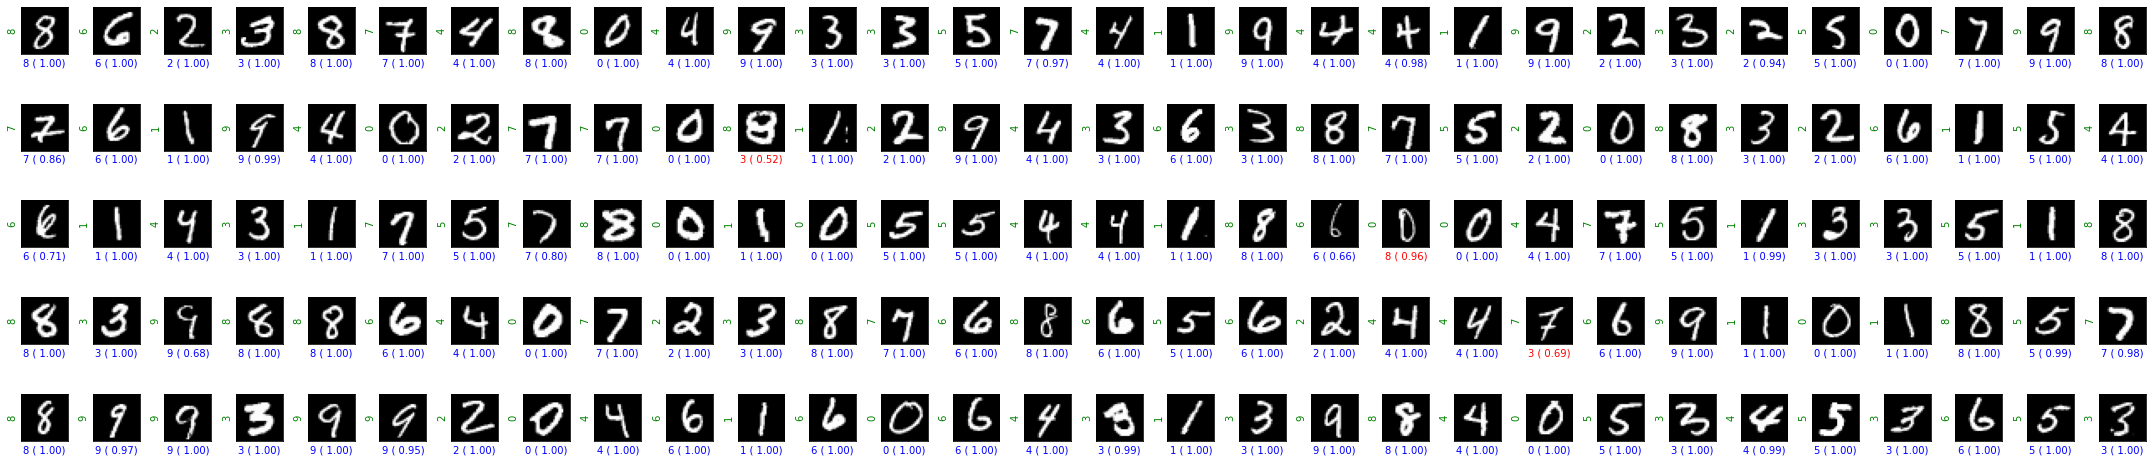

In [16]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test2.shape[0]), ROWS*COLS)
sample_images = X_test2[random_indices, :]
sample_labels = Y_test2[random_indices]
predictions = model2.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [17]:
# Normalize Data

model3 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [18]:
# Using 'SGD'

model3.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [19]:
# Normalize Data 

h3 = model3.fit(x=X_train1, y=Y_train1, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 4s 3ms/step - loss: 1.0553 - accuracy: 0.6815 - val_loss: 0.2979 - val_accuracy: 0.9112
Epoch 2/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2228 - accuracy: 0.9314 - val_loss: 0.1740 - val_accuracy: 0.9487
Epoch 3/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1520 - accuracy: 0.9538 - val_loss: 0.1434 - val_accuracy: 0.9577
Epoch 4/5
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1190 - accuracy: 0.9635 - val_loss: 0.1036 - val_accuracy: 0.9694
Epoch 5/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0985 - accuracy: 0.9698 - val_loss: 0.0915 - val_accuracy: 0.9712


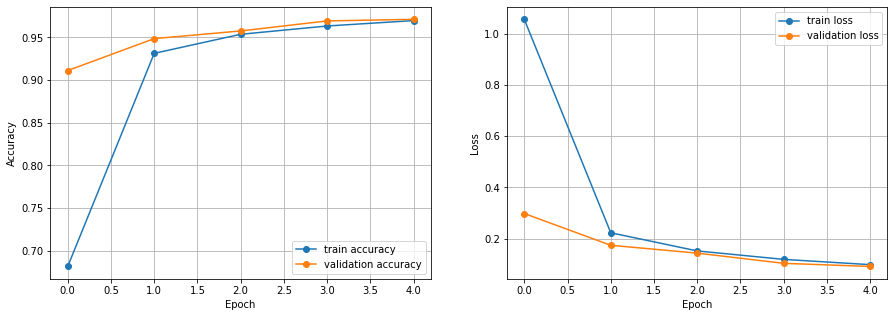

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [21]:
# Normalize Data

test_loss1, test_acc1 = model3.evaluate(X_test1, Y_test1)
print('\nTest Accuracy:', test_acc1)
print('\nTest Loss:', test_loss1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0815 - accuracy: 0.9737

Test Accuracy: 0.9736999869346619

Test Loss: 0.08149456977844238


Got **97.37%** accuracy for SGD ( For normalize data).

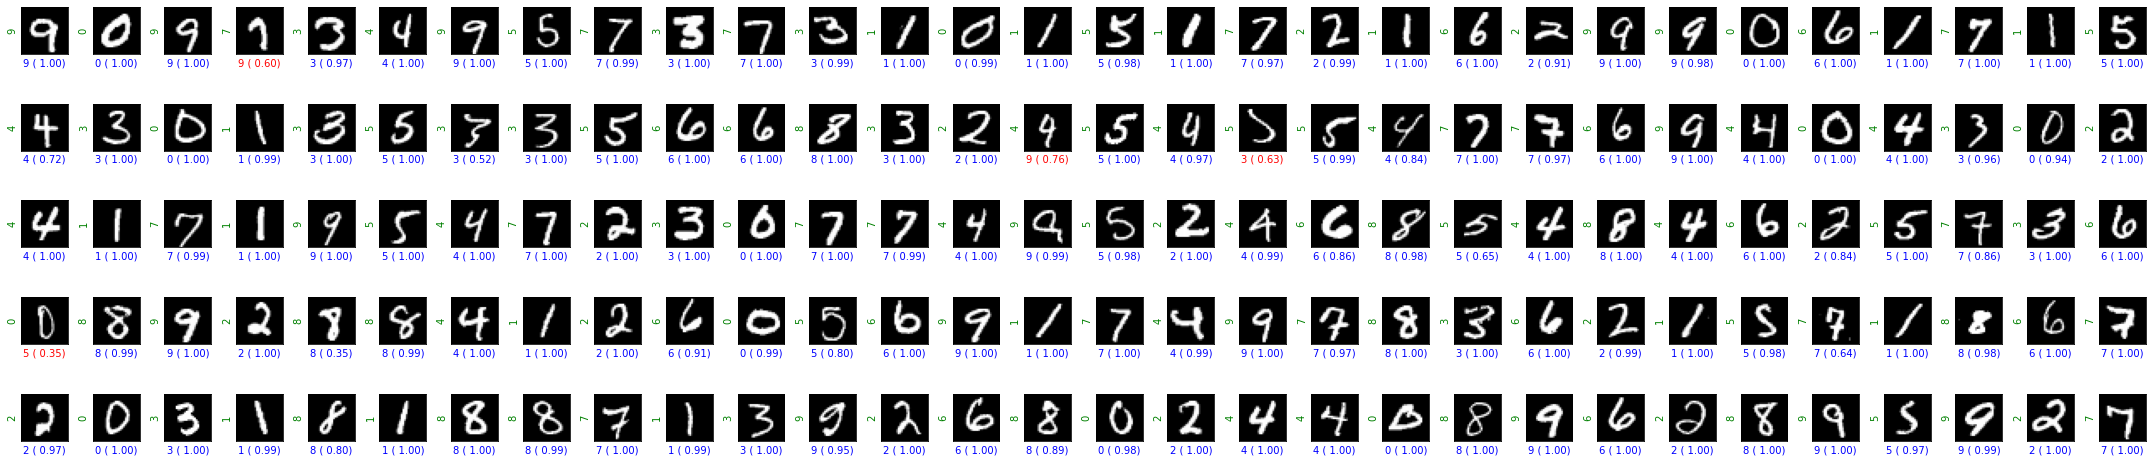

In [22]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test1.shape[0]), ROWS*COLS)
sample_images = X_test1[random_indices, :]
sample_labels = Y_test1[random_indices]
predictions = model3.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [23]:
# Without Normalize Data

model4 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)               

In [24]:
# Using 'SGD'

model4.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [25]:
# Without Normalize Data

h4 = model4.fit(x=X_train2, y=Y_train2, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 4s 3ms/step - loss: 1.0303 - accuracy: 0.7685 - val_loss: 0.1771 - val_accuracy: 0.9456
Epoch 2/5
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1569 - accuracy: 0.9518 - val_loss: 0.1414 - val_accuracy: 0.9574
Epoch 3/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1110 - accuracy: 0.9660 - val_loss: 0.0991 - val_accuracy: 0.9689
Epoch 4/5
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0869 - accuracy: 0.9730 - val_loss: 0.1029 - val_accuracy: 0.9692
Epoch 5/5
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0715 - accuracy: 0.9775 - val_loss: 0.0834 - val_accuracy: 0.9760


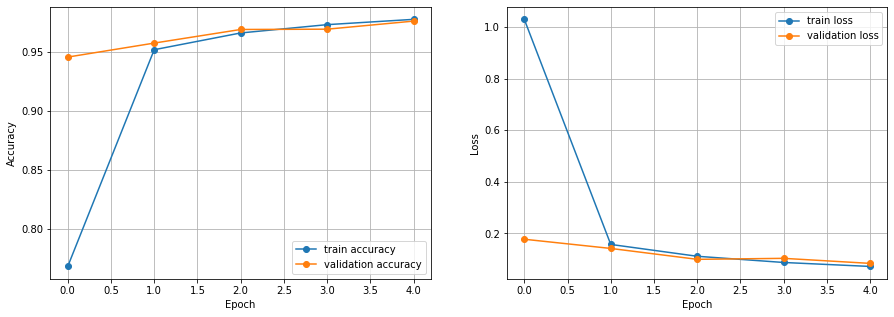

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h4.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h4.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h4.history['loss'], 'o-', label='train loss')
plt.plot(h4.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [27]:
# Without Normalize Data

test_loss2, test_acc2 = model4.evaluate(X_test2, Y_test2)
print('\nTest Accuracy:', test_acc2)
print('\nTest Loss:', test_loss2)

313/313 [==============================] - 1s 2ms/step - loss: 0.0730 - accuracy: 0.9782

Test Accuracy: 0.9782000184059143

Test Loss: 0.0730140209197998


Got **97.82%** accuracy for SGD ( Without normalize data).

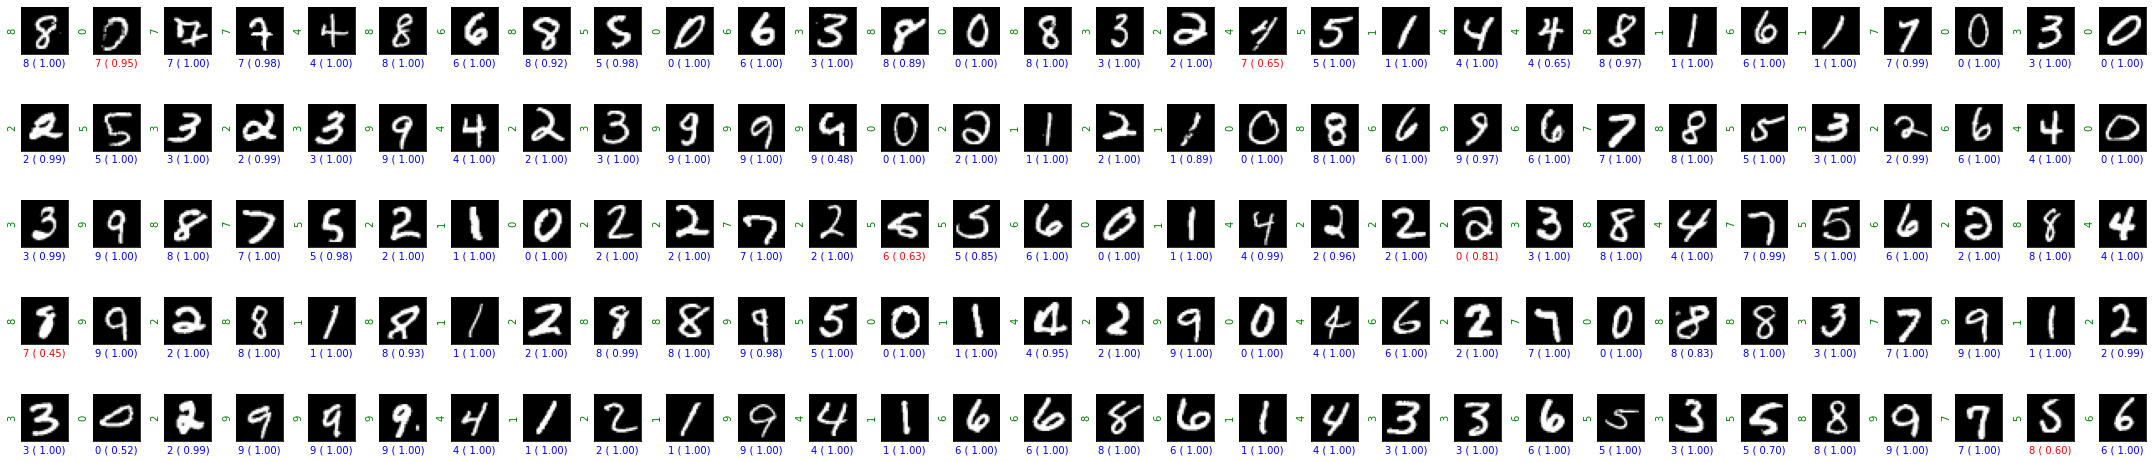

In [28]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test2.shape[0]), ROWS*COLS)
sample_images = X_test2[random_indices, :]
sample_labels = Y_test2[random_indices]
predictions = model4.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [29]:
# Normalize Data

model5 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)               

In [30]:
# Using 'RMSProp'

model5.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [31]:
# Normalize Data

h5 = model5.fit(x=X_train1, y=Y_train1, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2438 - accuracy: 0.9244 - val_loss: 0.0806 - val_accuracy: 0.9759
Epoch 2/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0706 - accuracy: 0.9789 - val_loss: 0.0627 - val_accuracy: 0.9805
Epoch 3/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0482 - accuracy: 0.9855 - val_loss: 0.0529 - val_accuracy: 0.9854
Epoch 4/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0386 - accuracy: 0.9885 - val_loss: 0.0494 - val_accuracy: 0.9864
Epoch 5/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0306 - accuracy: 0.9910 - val_loss: 0.0441 - val_accuracy: 0.9877


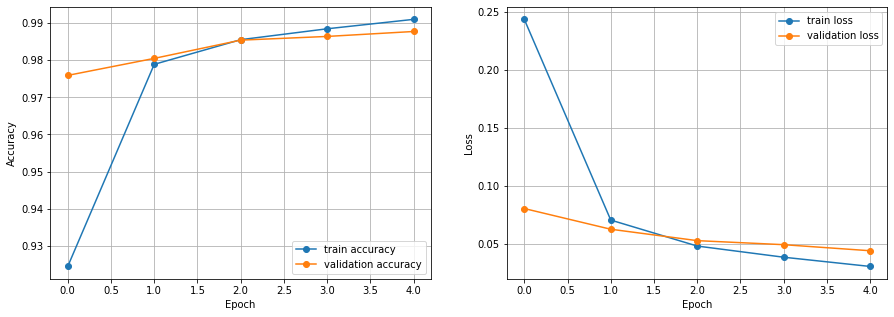

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h5.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h5.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h5.history['loss'], 'o-', label='train loss')
plt.plot(h5.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [33]:
# Normalize Data

test_loss1, test_acc1 = model5.evaluate(X_test1, Y_test1)
print('\nTest Accuracy:', test_acc1)
print('\nTest Loss:', test_loss1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0423 - accuracy: 0.9884

Test Accuracy: 0.9883999824523926

Test Loss: 0.042344387620687485


Got **98.84%** accuracy for RMSProp ( For normalize data).

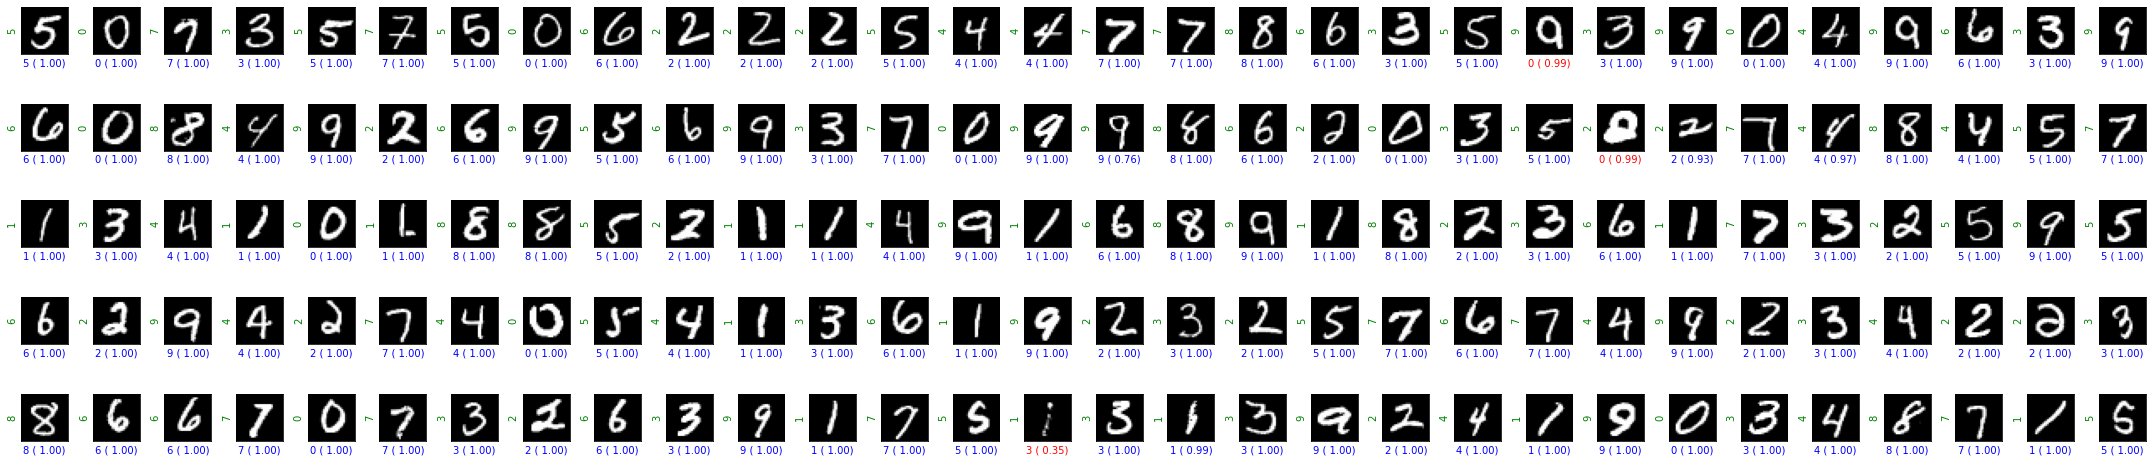

In [34]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test1.shape[0]), ROWS*COLS)
sample_images = X_test1[random_indices, :]
sample_labels = Y_test1[random_indices]
predictions = model5.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [35]:
# Without Normalize Data

model6 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)               

In [37]:
# Using 'RMSProp'

model6.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [38]:
# Without Normalize Data

h6 = model6.fit(x=X_train2, y=Y_train2, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3941 - accuracy: 0.9183 - val_loss: 0.1300 - val_accuracy: 0.9640
Epoch 2/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0917 - accuracy: 0.9756 - val_loss: 0.1187 - val_accuracy: 0.9702
Epoch 3/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0737 - accuracy: 0.9815 - val_loss: 0.0763 - val_accuracy: 0.9826
Epoch 4/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0665 - accuracy: 0.9841 - val_loss: 0.0709 - val_accuracy: 0.9835
Epoch 5/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0664 - accuracy: 0.9853 - val_loss: 0.0732 - val_accuracy: 0.9845


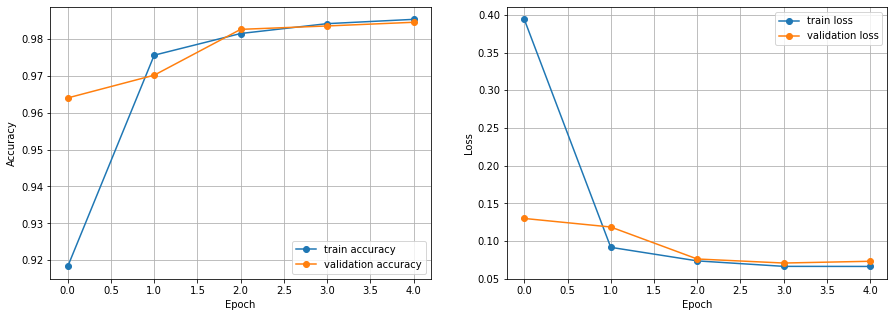

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h6.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h6.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h6.history['loss'], 'o-', label='train loss')
plt.plot(h6.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [40]:
# Without Normalize Data

test_loss2, test_acc2 = model6.evaluate(X_test2, Y_test2)
print('\nTest Accuracy:', test_acc2)
print('\nTest Loss:', test_loss2)

313/313 [==============================] - 1s 2ms/step - loss: 0.0742 - accuracy: 0.9846

Test Accuracy: 0.9846000075340271

Test Loss: 0.07424002140760422


Got **98.46%** accuracy for RMSProp ( Without normalize data ).

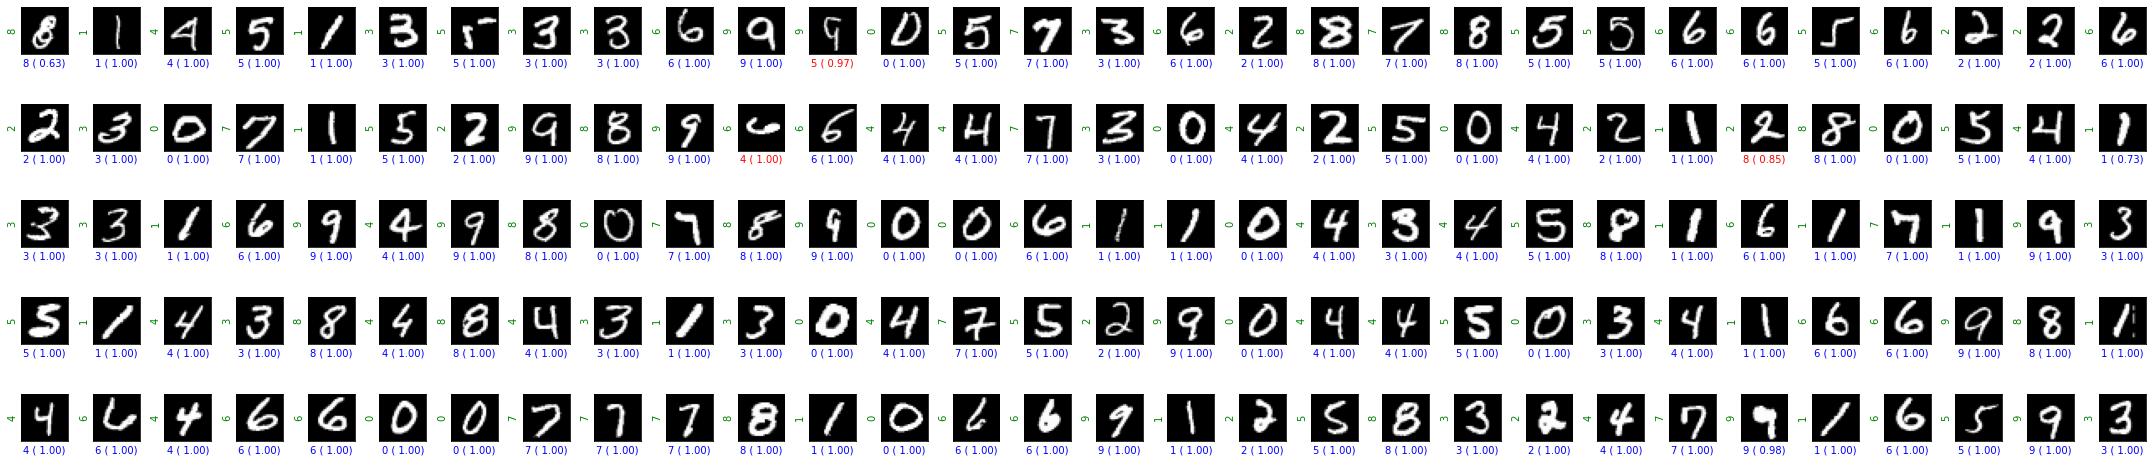

In [41]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test2.shape[0]), ROWS*COLS)
sample_images = X_test2[random_indices, :]
sample_labels = Y_test2[random_indices]
predictions = model6.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

From the above analysis; we see that for Normaliztaion, RMSprop (**98.84%**) gives better accuracy than the other two optimizers Adam (**98.69%**) and SGD (**97.37%**). But if we do it without normalize data then we find that, again RMSProp (**98.46%**) gives better perfomance than the other two Adam (**97.71%**) and SGD (**97.82%**). So, we can say that RMSprop is better optimizer than Adam and SGD and it is good to do the perform with normalize data because we see from the above analysis if we do the perform without normalize data, then accuracy (for all the three optimizers) dicreases.